In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assignment5


**Ground Cricket Chirps**

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]
                       }
df = pd.DataFrame(ground_cricket_data)

**Tasks**

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [18]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]
                       }
df = pd.DataFrame(ground_cricket_data)

###CHECKING IF DATA IS GOOD, IF FEATURES NEEDS ENCODING AND CHECKING FOR LINEAR RELATIONSHIP B/W FEATURE AND OUTPUT

In [4]:
df.shape


(15, 2)

In [5]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [6]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [7]:
df.duplicated(keep='first')

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
dtype: bool

CHECKING IF DATA NEEDS TO BE ENCODED (IF ALL THE DATA IS OF NUMERIC TYPIC)

In [8]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

CHECKING IF THERE IS A LINEAR RELATION BETWEEN FEATURE AND TARGET

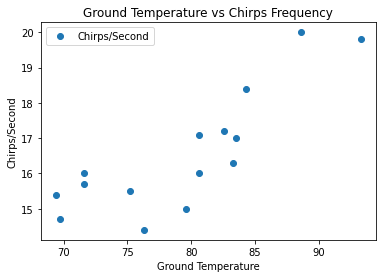

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [9]:
df.plot(x='Ground Temperature', y='Chirps/Second', style='o')
plt.title('Ground Temperature vs Chirps Frequency')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()

df.corr()

1. High Correlation b/w data. hence can perform LINEAR REGRESSION

1. As the data has a feature (Ground Temperature) and a target output (Chirps/Second), Hence it of SUPERVISED LEARNING
2. As the values are continuous values, hence it of REGRESSION.


###**TASK 1**
Find the linear regression equation for this data.

In [10]:
#SPLITING THE DATA INTO TRAINING AND TESTING

from sklearn.model_selection import train_test_split

X= df[['Ground Temperature']].values  # OR .iloc[: , -1:0:-1].values OR drop('Chirps/Second', axis=1).values # Ground Temperature-- array of features
Y= df['Chirps/Second'].values         # OR .iloc[ : , 0].values  # Chirps/Second-- array of targerts

#X
#Y

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

#MODELLING

from sklearn.linear_model import LinearRegression           #Importing: importing all the required functions

regressor = LinearRegression()                              #Initialisation: Predicted Chirps/second = m * Ground Temperature + c  (y = m * x + c)

regressor.fit(X_train, Y_train)                             #Fitting: Learning happens - GD is done and we get the final values of m and c


Y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions

#Y_pred

In [11]:
print("m: ",regressor.coef_[0]) #m
print("c: ",regressor.intercept_) # c

m:  0.2385354372668601
c:  -2.4577905737462267


In [12]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df1

,Actual,Predicted
0,14.7,14.168129
1,15.0,16.529630
2,15.7,14.621347
3,16.0,14.621347
4,19.8,19.797566


THE LINEAR REGRESSION EQUATION FOR THE DATA

In [13]:
#y = m * x + c

print("Predicted Chirps/second (Y) = {} * Ground_Temperature (x) + {}".format(regressor.coef_[0],regressor.intercept_))

Predicted Chirps/second (Y) = 0.2385354372668601 * Ground_Temperature (x) + -2.4577905737462267


###**TASK 2**
Chart the original data and the equation on the chart.

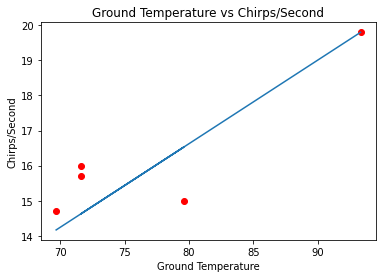

In [14]:
plt.plot(X_test, Y_test, 'or')
plt.plot(X_test, Y_pred)
plt.title('Ground Temperature vs Chirps/Second')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()

###**TASK 3**
Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data.

In [15]:
from sklearn import metrics
print('R2- SCORE for this Equation :', metrics.r2_score(Y_test,Y_pred))

R2- SCORE for this Equation : 0.6641366289286785


###**TASK 4**
Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [16]:
# GIVEN GROUND TEMPERATURE = 95 F
# FIND CHIRPS/SECOND OR CHIRPS FREQUENCY

#   FORMULA
#       Predicted Chirps/second = (regressor.coef_ * Ground Temperature) + regressor.intercept_    (y = m * x + c)

print("Predicted Chirps Frequency (Chirps/second) at 95 F:", round( regressor.predict( [[95]] )[0], 4 ) )

Predicted Chirps Frequency (Chirps/second) at 95 F: 20.2031


###**TASK 5**
Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [17]:
# GIVEN CHIRPS/SECOND OR CHIRPS FREQUENCY = 18
# FIND APPROX. GROUND TEMPERATURE

#   FORMULA
#       Predicted Chirps/second = (regressor.coef_ * Ground Temperature) + regressor.intercept_    (y = m * x + c)
#       Predicted Ground Temperature  =  (Chirps/Second - regressor.intercept_) / regressor.coef_  (x = y - c / m)

y = 18
m = regressor.coef_[0]
c = regressor.intercept_

print("Approximate Ground Temperture when Chirps Frequency is 18:", round( (y - c ) / m, 3),"F")

Approximate Ground Temperture when Chirps Frequency is 18: 85.764 F
